In [4]:
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
data = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.shape

(1599, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

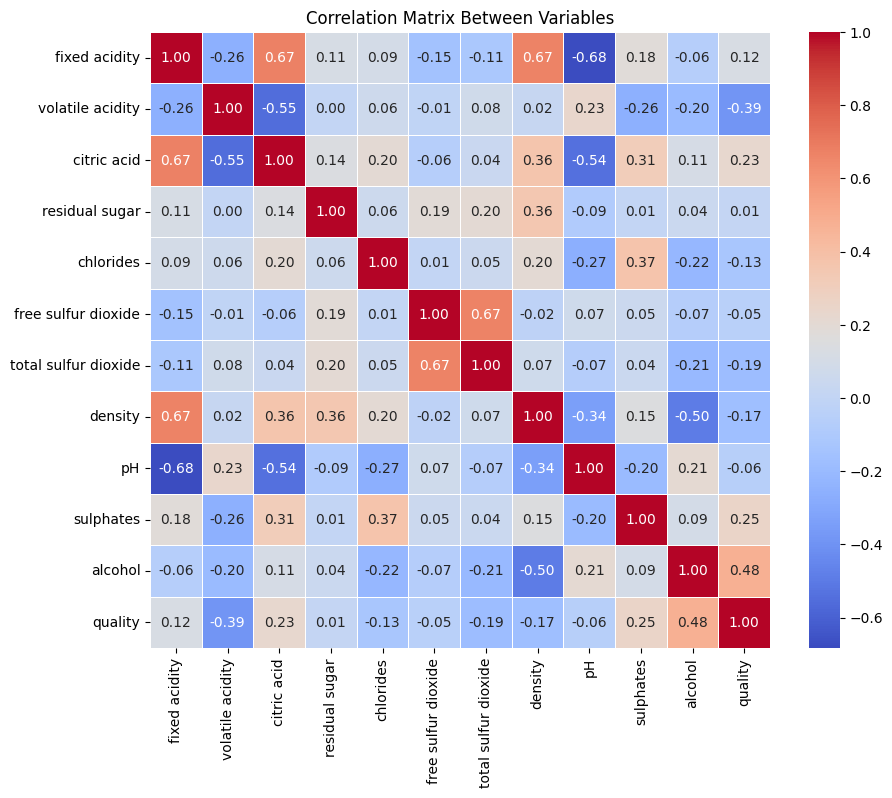

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Between Variables")
plt.show()

In [17]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = data.drop('quality', axis=1)
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Lasso
lasso_params = {'alpha': [0.01,0.1, 1,10,100]}

# Hyperparameter grid for Ridge
ridge_params = {'alpha': [0.01,0.1, 1,10,100]}

# Hyperparameter grid for Elastic Net
elastic_net_params = {'alpha': [0.01,0.1, 1,10,100],
                      'l1_ratio': [0.2, 0.4, 0.6, 0.8]}

# Lasso
lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid_search.fit(X_train, y_train)

# Ridge
ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Elastic Net
elastic_net_grid_search = GridSearchCV(ElasticNet(), elastic_net_params, cv=5)
elastic_net_grid_search.fit(X_train, y_train)

# Best Lasso Model
best_lasso_model = lasso_grid_search.best_estimator_
print("Best Lasso Model:", best_lasso_model)

# Best Ridge Model
best_ridge_model = ridge_grid_search.best_estimator_
print("Best Ridge Model:", best_ridge_model)

# Best Elastic Net Model
best_elastic_net_model = elastic_net_grid_search.best_estimator_
print("Best Elastic Net Model:", best_elastic_net_model)


Best Lasso Model: Lasso(alpha=0.01)
Best Ridge Model: Ridge(alpha=100)
Best Elastic Net Model: ElasticNet(alpha=0.01, l1_ratio=0.8)


In [43]:
# Evaluation
y_pred_lasso = best_lasso_model.predict(X_test)
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_elastic_net = best_elastic_net_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print("Best Lasso MSE:", mse_lasso)
print("Best Ridge MSE:", mse_ridge)
print("Best Elastic Net MSE:", mse_elastic_net)


Best Lasso MSE: 0.3929452396195009
Best Ridge MSE: 0.39261761643938853
Best Elastic Net MSE: 0.39261241919347023


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Train a linear regression model (baseline model without regularization)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using the baseline model
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE for the baseline model
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Print the MSE for comparison
print("Baseline Linear Regression MSE:", mse_linear)


Baseline Linear Regression MSE: 0.39002514396395493


In [45]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Best Lasso MAE:", mae_lasso)
print("Best Ridge MAE:", mae_ridge)
print("Best Elastic Net MAE:", mae_elastic_net)
print("Baseline Linear Regression MAE:", mae_linear)

Best Lasso MAE: 0.5076761863956893
Best Ridge MAE: 0.5068641661756494
Best Elastic Net MAE: 0.5069817385219988
Baseline Linear Regression MAE: 0.5035304415524375


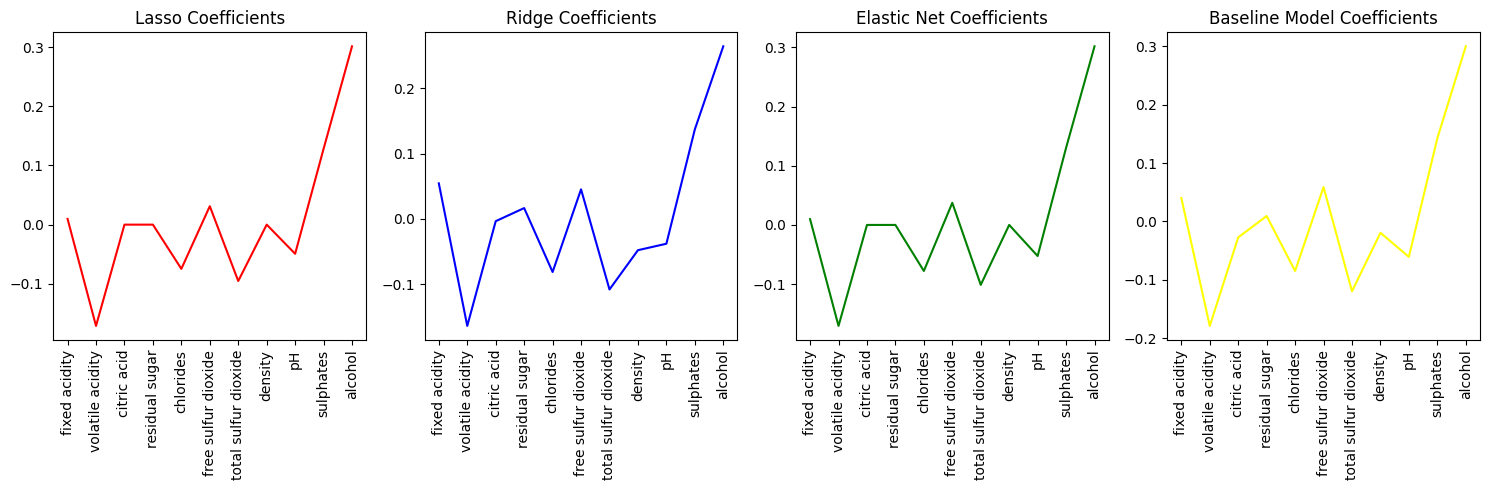

In [38]:
# Get coefficients
lasso_coeffs = best_lasso_model.coef_
ridge_coeffs = best_ridge_model.coef_
elastic_net_coeffs = best_elastic_net_model.coef_
baseline_model_coeffs = linear_model.coef_
# Plotting coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.plot(lasso_coeffs, color='red')
plt.title('Lasso Coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)

plt.subplot(1, 4, 2)
plt.plot(ridge_coeffs, color='blue')
plt.title('Ridge Coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)

plt.subplot(1, 4, 3)
plt.plot(elastic_net_coeffs, color='green')
plt.title('Elastic Net Coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)

plt.subplot(1, 4, 4)
plt.plot(baseline_model_coeffs, color='yellow')
plt.title('Baseline Model Coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)



plt.tight_layout()
plt.show()


**svr experiment**

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

C_values = [0.01, 0.1, 1, 10, 100]
performance_results = []

for C in C_values:
    model = SVR(C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    num_support_vectors = len(model.support_)

    performance_results.append((C, mse, mae, num_support_vectors))

for result in performance_results:
    print(f"C={result[0]}: MSE={result[1]}, MAE={result[2]}, Support Vectors={result[3]}")


C=0.01: MSE=0.46783427367440983, MAE=0.5446132202112667, Support Vectors=1152
C=0.1: MSE=0.3897184785805671, MAE=0.48926586155596696, Support Vectors=1054
C=1: MSE=0.35160700390834726, MAE=0.4539632367866625, Support Vectors=1013
C=10: MSE=0.3638038808922598, MAE=0.4555370477496659, Support Vectors=1049
C=100: MSE=0.5064610435116244, MAE=0.5234308656496607, Support Vectors=1069


best result for above experiment is below.
C=1: MSE=0.35160700390834754, MAE=0.4539632367866625, Support Vectors=1013

**random forest** **experiment**

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest_model.predict(X_test)


In [48]:
# Calculate performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest MAE:", mae_rf)


Random Forest MSE: 0.3013528125
Random Forest MAE: 0.42196875


**performing prediction**

In [57]:
feature_names=X.columns
values = [-0.35600048, 0.27976995, -0.98066858, -0.02753165, 0.56393475,
          -0.27930021, -0.01422508, 0.18726488, -0.56076217, 0.01092425,
          -0.87251161]
test_df = pd.DataFrame([values], columns=feature_names)

In [58]:
y_pred = random_forest_model.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [59]:
y_pred

array([5.27])